# <u>Detección de Fake News con Deep Learning</u>

## <u>LSTM</u>

In [1]:
# Instalacion de dependencias

! pip install pandas numpy tensorflow scikit-learn nltk

In [2]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('/content/fake_or_real_news.csv')

# Visualizar las primeras filas
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Cantidad de filas y columnas del dataset

print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 6335 filas y 4 columnas.


In [4]:
# Columnas del dataset

df.columns

Index(['id', 'title', 'text', 'label'], dtype='object')

In [5]:
import nltk  # Es una biblioteca popular para el procesamiento de lenguaje natural (NLP).
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Descargar stopwords
nltk.download('stopwords') #Palabras comunes que a menudo no aportan valor semántico y se eliminan.
nltk.download('punkt') # Tokenizador para dividir el texto en palabras o frases

stop_words = set(stopwords.words('english')) # Stipowords para idioma inglés

# Función para preprocesamiento de texto

def preprocess_text(text):
    # Tokenización

    # word_tokenize divide el texto en palabras individuales o tokens
    # text.lower() convierte todo el texto a minúsculas

    tokens = word_tokenize(text.lower())

    # Remover signos de puntuación y stopwords

    # Solo se incluye palabras que contienen caracteres alfabéticos (elimina números, símbolos, puntuación, etc.).
    # y palabras que no estén en stopwords

    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return ' '.join(tokens) # Combina los tokens filtrados en un solo string, separándolos con espacios.

# Aplicar la limpieza al dataset

df['cleaned_text'] = df['text'].apply(preprocess_text) # Aplica la función preprocess_text a cada fila de la columna df['text']

# Primeras columnas del texto procesado

df['cleaned_text'].head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,cleaned_text
0,daniel greenfield shillman journalism fellow f...
1,google pinterest digg linkedin reddit stumbleu...
2,secretary state john kerry said monday stop pa...
3,kaydee king kaydeeking november lesson tonight...
4,primary day new york hillary clinton donald tr...


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Definir parámetros de tokenización

# Tokenizer: Convierte el texto en secuencias de enteros donde cada entero
# representa una palabra en el vocabulario.

# num_words=5000: Define un vocabulario limitado a las 5000 palabras más frecuentes

tokenizer = Tokenizer(num_words=5000)

# fit_on_texts: Aprende el vocabulario a partir de los textos preprocesados.

tokenizer.fit_on_texts(df['cleaned_text'])

# Convertir textos a secuencias

# Convierte cada texto en una lista de enteros según el vocabulario aprendido.

X = tokenizer.texts_to_sequences(df['cleaned_text'])

# Padding para asegurar que todas las secuencias tengan la misma longitud
# Ajusta todas las secuencias a una longitud fija de 100 palabras

X = pad_sequences(X, maxlen=100)

# Asignar etiquetas (0 para fake, 1 para real)

y = df['label'].apply(lambda x: 1 if x == 'REAL' else 0).values

In [7]:
# Valores del vector y

y

array([0, 0, 1, ..., 0, 1, 1])

In [8]:
from sklearn.model_selection import train_test_split

# División del dataset

# train_test_split: Divide los datos en conjuntos de entrenamiento y prueba:
# test_size=0.3: El 30% de los datos se reserva para pruebas.
# random_state=42: Garantiza la reproducibilidad.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2

# Crear el modelo
# Se define un modelo secuencial donde las capas se añaden una tras otra

model = Sequential()

# Añadir capa de embedding

# input_dim=5000: El tamaño del vocabulario es 5000.
# output_dim=32: Cada palabra se representa como un vector de 32 dimensiones.

model.add(Embedding(input_dim=5000, output_dim=32))


# Capa LSTM sin retorno de secuencias

# LSTM: Es una capa de memoria a largo plazo que captura relaciones entre palabras en las secuencias.
# 32: El tamaño de la capa (número de neuronas).
# return_sequences=False: Devuelve solo la salida final, no toda la secuencia intermedia.
# Dropout(0.5): Apaga aleatoriamente el 50% de las neuronas durante el entrenamiento para evitar el sobreajuste.

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.5))

# Añadir capa densa de salida

# Dense(1): Una neurona de salida para clasificar el texto en una de dos clases (binaria).
# activation='sigmoid': La función de activación genera una probabilidad entre 0 y 1.

model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo

# loss='binary_crossentropy': Función de pérdida para problemas de clasificación binaria.
# optimizer='adam': Optimizador eficiente y popular para redes neuronales.
# metrics=['accuracy']: Se supervisará la precisión del modelo.

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Entrenar el modelo


# EarlyStopping:
# - Monitorea la pérdida en los datos de validación (val_loss).
# - Detiene el entrenamiento si la pérdida no mejora durante 3 épocas consecutivas.
# - Restaura los pesos del modelo en la mejor época.

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrena el modelo durante un máximo de 10 épocas.
# Divide los datos en entrenamiento y validación.

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[early_stopping])



Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.6452 - loss: 0.6258 - val_accuracy: 0.8795 - val_loss: 0.3513
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9158 - loss: 0.2590 - val_accuracy: 0.8816 - val_loss: 0.3490
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9638 - loss: 0.1334 - val_accuracy: 0.8790 - val_loss: 0.3251
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9785 - loss: 0.0823 - val_accuracy: 0.8774 - val_loss: 0.4532
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9851 - loss: 0.0531 - val_accuracy: 0.8811 - val_loss: 0.4350
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9947 - loss: 0.0347 - val_accuracy: 0.8843 - val_loss: 0.4838


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8791 - loss: 0.3462
Accuracy del modelo: 87.9011%
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Precision: 0.8850
Recall: 0.8660
F1 Score: 0.8754


Text(0.5, 1.0, 'Matriz de Confusión para LSTM')

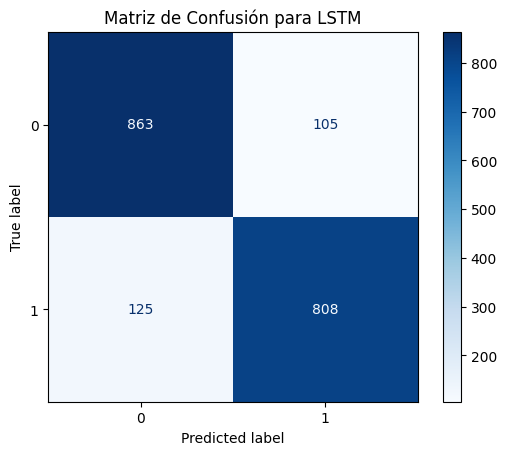

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Evaluar el modelo y calcular métricas de calidad.

# Calcula la pérdida y precisión en los datos de prueba.

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy del modelo: {accuracy*100:.4f}%')

# Generar predicciones del modelo
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Convertir probabilidades a 0 o 1 usando un umbral de 0.5


# Calcular métricas
precision = precision_score(y_test, y_pred_labels, average='binary')
recall = recall_score(y_test, y_pred_labels, average='binary')
f1 = f1_score(y_test, y_pred_labels, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión para LSTM')



1. Evidencias de sobreajuste:

* Divergencia entre pérdida (loss):

    + La pérdida de entrenamiento disminuye significativamente (por ejemplo, en la última época es 0.0347) mientras que la pérdida de validación comienza a aumentar (de 0.3513 en la época 1 a 0.4838 en la época 5).

* Estancamiento o disminución en la precisión de validación (val_accuracy):
    + Aunque la precisión de entrenamiento mejora consistentemente (de 0.6452 a 0.9947), la precisión de validación se estanca o incluso disminuye ligeramente (de 0.8816 en la epoca 2 a 0.8790 en la época 3).

2. Evidencias del problema en este modelo:

* La pérdida de validación aumenta a partir de la época 3 (0.3251) y sigue aumentando hasta la época 6 (0.4838).

* La precisión de entrenamiento sigue mejorando (hasta 0.9947) y muestra una discrepancia notable con la precisión de validación (0.8843).

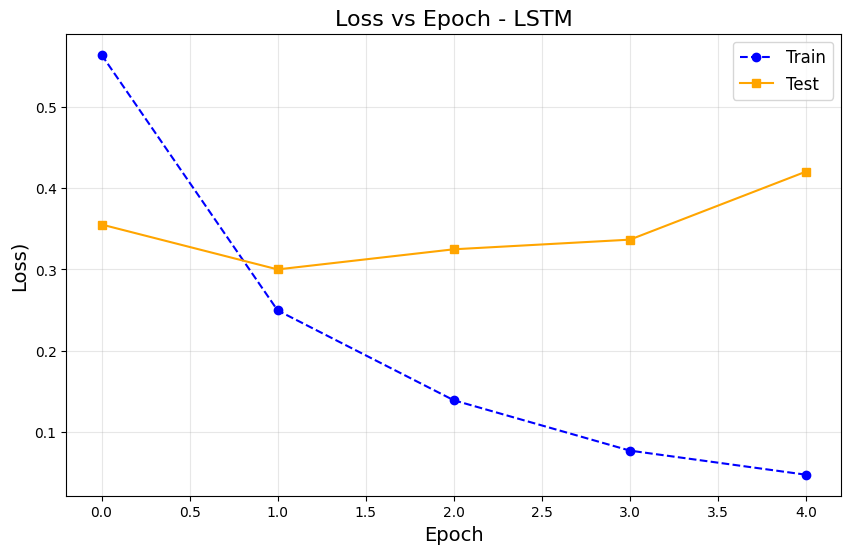

In [13]:
import matplotlib.pyplot as plt

# Graficar la pérdida en cada epoch
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train', color='blue', linestyle='--', marker='o')
plt.plot(history.history['val_loss'], label='Test', color='orange', linestyle='-', marker='s')

# Configuración del gráfico
plt.title('Loss vs Epoch - LSTM', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Guardar el gráfico como archivo SVG
plt.savefig('loss_epoch_lstm.svg', format='svg')
plt.show()

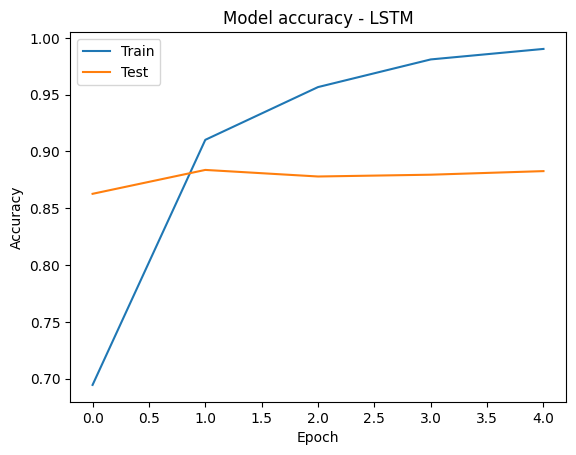

In [14]:
# Gráfico de valores del Accuracy de Entrenamiento y Prueba
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy - LSTM')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Guardar el gráfico como archivo SVG
plt.savefig('accuracy_lstm.svg', format='svg')

plt.show()

## Bert

In [12]:
! pip install transformers datasets torch

In [14]:
from transformers import BertTokenizer

# Cargar el tokenizador preentrenado de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar el texto
def tokenize_data(texts):
    return tokenizer(texts, max_length=512, padding='max_length', truncation=True, return_tensors='pt')

# Tokenizamos el texto de noticias
tokenized_texts = tokenize_data(list(df['text']))

In [15]:
from transformers import BertForSequenceClassification, AdamW
import torch
# Cargar el modelo preentrenado de BERT para clasificación de secuencias
bertmodel = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Mover el modelo a la GPU si está disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
bertmodel.to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [19]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Extraer los IDs de tokens, las máscaras de atención y las etiquetas
input_ids = tokenized_texts['input_ids']
attention_masks = tokenized_texts['attention_mask']
labels = torch.tensor(df['label'].apply(lambda x: 1 if x == 'REAL' else 0).values)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_inputs, val_inputs, train_masks, val_masks, train_labels, val_labels = train_test_split(
    input_ids, attention_masks, labels, test_size=0.3, random_state=42
)

# Crear tensores de entrada para el entrenamiento
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=16)

# Configurar el optimizador
optimizer = AdamW(bertmodel.parameters(), lr=2e-5)

# Función de entrenamiento (sin cambios)
def train_model(model, train_dataloader, optimizer, epochs=3):

    perdida=[]
    model.train()

    for epoch in range(epochs):
        for batch in train_dataloader:
            batch = tuple(t.to(device) for t in batch)

            inputs = {
                'input_ids': batch[0],
                'attention_mask': batch[1],
                'labels': batch[2]
            }

            model.zero_grad()

            outputs = model(**inputs)
            loss = outputs.loss
            loss.backward()
            optimizer.step()
        perdida.append(loss.item())
        print(f'Epoch {epoch + 1} completed with loss: {loss.item()}')

    return perdida

# Entrenar el modelo
entrenamiento = train_model(bertmodel, train_dataloader, optimizer, epochs=3)


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1 completed with loss: 0.0003769876784645021
Epoch 2 completed with loss: 0.00037478015292435884
Epoch 3 completed with loss: 0.0090162493288517


Accuracy del modelo: 97.3698%
Precision: 0.9501
Recall: 0.9989
F1 Score: 0.9739


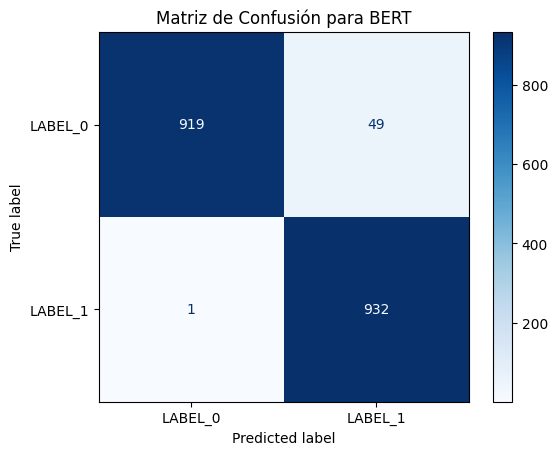

In [20]:
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Asignación de datos de validación a variables de prueba
test_inputs = val_inputs
test_masks = val_masks
test_labels = val_labels

# Creación de tensores de entrada para datos de prueba
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_dataloader = DataLoader(test_data, batch_size=32)

# Función para evaluar el modelo
def evaluate_model_with_metrics(model, test_dataloader):
    model.eval()  # Cambiar a modo evaluación
    preds, true_labels = [], []

    with torch.no_grad():
        for batch in test_dataloader:
            batch = tuple(t.to(device) for t in batch)
            inputs = {'input_ids': batch[0], 'attention_mask': batch[1]}
            labels = batch[2]

            outputs = model(**inputs)
            logits = outputs.logits

            # Obtener las predicciones
            preds.append(torch.argmax(logits, axis=1).cpu().numpy())
            true_labels.append(labels.cpu().numpy())

    # Aplanar listas de predicciones y etiquetas reales
    preds = [item for sublist in preds for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]

    # Calcular métricas
    accuracy = accuracy_score(true_labels, preds)
    precision = precision_score(true_labels, preds, average='binary')  # Ponderar por clases
    recall = recall_score(true_labels, preds, average='binary')
    f1 = f1_score(true_labels, preds, average='binary')

    print(f'Accuracy del modelo: {accuracy*100:.4f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    # Matriz de confusión
    conf_matrix = confusion_matrix(true_labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.config.id2label.values())
    disp.plot(cmap='Blues')

    plt.title('Matriz de Confusión para BERT')

    # Guardar el gráfico como archivo SVG
    plt.savefig('confusion_matrix_bert.svg', format='svg')
    plt.show()

# Evaluar el modelo
evaluate_model_with_metrics(bertmodel, test_dataloader)




In [21]:
entrenamiento

[0.0003769876784645021, 0.00037478015292435884, 0.0090162493288517]

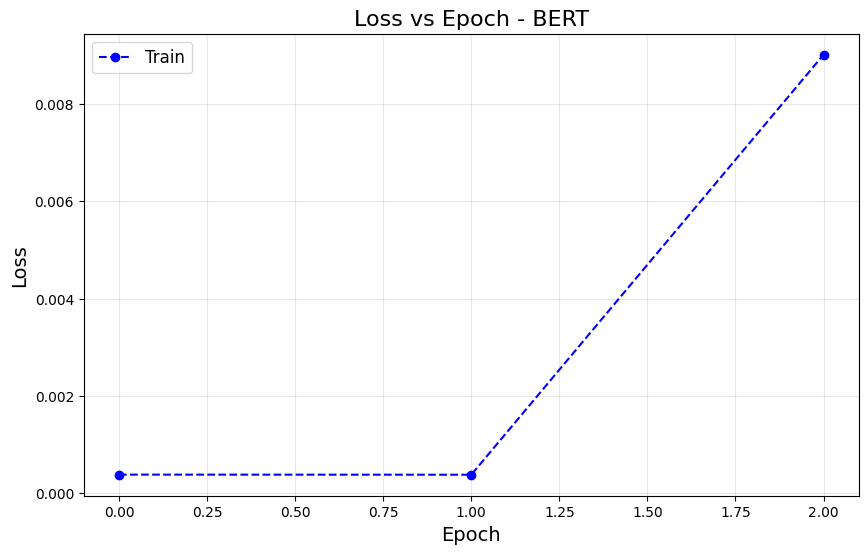

In [22]:
import numpy as np

# Graficar la pérdida en cada epoch
plt.figure(figsize=(10, 6))
#plt.plot(history.history['loss'], label='Entrenamiento', color='blue', linestyle='--', marker='o')
#plt.plot(history.history['val_loss'], label='Validación', color='orange', linestyle='-', marker='s')
epoca = np.array([0, 1, 2])
entrenamiento = np.array(entrenamiento)
plt.plot(epoca, entrenamiento, label='Train', color='blue', linestyle='--', marker='o')

# Configuración del gráfico
plt.title('Loss vs Epoch - BERT', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

## <u>LSTM con Glove</u>

GloVe (Global Vectors for Word Representation) es un modelo para aprender representaciones vectoriales de palabras basado en matrices de coocurrencia y descomposición matemática. Fue desarrollado por investigadores de Stanford y combina ideas clave de métodos basados en conteo (como matrices de coocurrencia) y métodos predictivos (como Word2Vec).

In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
! unzip glove.6B.zip

--2025-01-19 17:22:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-19 17:22:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-19 17:22:53--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [24]:
import numpy as np

# Cargar los vectores de palabras GloVe preentrenados (100 dimensiones por palabra usando glove.6B.100d.txt )
# en un diccionario llamado embedding_index.


# Cada línea del archivo tiene el formato: <palabra> <valores del vector separados por espacios>.
# Se almacena la palabra como clave y su vector como valor en el diccionario embedding_index.

embedding_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        embedding_index[word] = np.array(values[1:], dtype='float32')

print(f"Total embeddings loaded: {len(embedding_index)}")

Total embeddings loaded: 400000


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización del texto

# Se utiliza Tokenizer para convertir las palabras a índices numéricos, con un máximo de 5000 palabras únicas.
# Se ajusta el tokenizador (fit_on_texts) sobre la columna cleaned_text del DataFrame df.

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_text'])

# Convertir los textos a secuencias de enteros
# Se aplica padding para garantizar que todas las secuencias tengan una longitud de 100.

X = tokenizer.texts_to_sequences(df['cleaned_text'])
X = pad_sequences(X, maxlen=100)

# Convertir etiquetas (0 para fake, 1 para real)
y = df['label'].apply(lambda x: 1 if x == 'REAL' else 0).values

# Crear una matriz de embedding usando los vectores GloVe

# Se obtiene el índice de palabras (word_index) generado por el Tokenizer.
# Se inicializa una matriz de ceros llamada embedding_matrix con dimensiones (len(word_index) + 1, 100).

word_index = tokenizer.word_index
embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))


# Si la palabra existe en los embeddings GloVe (embedding_index), se copia su vector
# en la posición correspondiente de embedding_matrix.

# embedding_matrix contiene los vectores GloVe para las palabras del vocabulario.

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [26]:
# División del dataset

# train_test_split: Divide los datos en conjuntos de entrenamiento y prueba:
# test_size=0.3: El 30% de los datos se reserva para pruebas.
# random_state=42: Garantiza la reproducibilidad.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Construir el modelo
modelgv = Sequential()

# Capa de embedding con los pesos de GloVe cargados
modelgv.add(Embedding(input_dim=len(word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=100,
                    trainable=False))  # Mantener los embeddings GloVe fijos

# Añadir una capa LSTM
modelgv.add(LSTM(128, return_sequences=False))

# Añadir una capa de Dropout
modelgv.add(Dropout(0.5))

# Añadir una capa densa de salida
modelgv.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
modelgv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
modelgv.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       6,200,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,200,800 (23.65 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 6,200,800 (23.65 MB)

In [28]:
# Entrenar el modelo

from tensorflow.keras.callbacks import EarlyStopping

# El modelo se entrena durante un máximo de 15 épocas, usando el conjunto de validación para evaluar el rendimiento.

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history2 = modelgv.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[early_stopping])


Epoch 1/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6662 - loss: 0.6057 - val_accuracy: 0.7722 - val_loss: 0.4758
Epoch 2/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7945 - loss: 0.4509 - val_accuracy: 0.8211 - val_loss: 0.3995
Epoch 3/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8160 - loss: 0.4152 - val_accuracy: 0.8311 - val_loss: 0.4419
Epoch 4/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8546 - loss: 0.3449 - val_accuracy: 0.8264 - val_loss: 0.3962
Epoch 5/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8313 - loss: 0.3720 - val_accuracy: 0.8375 - val_loss: 0.3876
Epoch 6/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8451 - loss: 0.3509 - val_accuracy: 0.8638 - val_loss: 0.3355
Epoch 7/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8747 - loss: 0.2956 - val_accuracy: 0.8480 - val_loss: 0.3472
Epoch 8/15
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8919 - loss: 0.2657 - val_accuracy: 0

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8744 - loss: 0.3072
Precisión del modelo: 87.4277%
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Precision: 0.8850
Recall: 0.8660
F1 Score: 0.8754


Text(0.5, 1.0, 'Confusion Matrix')

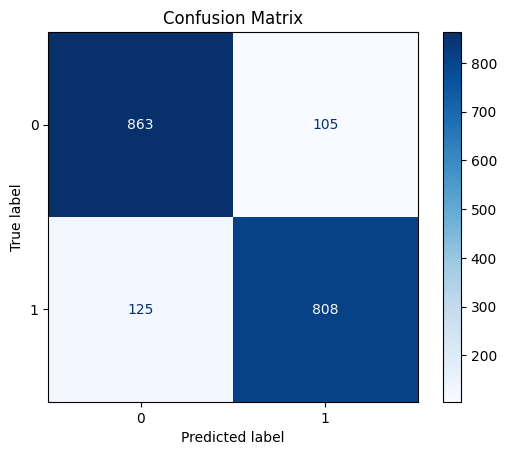

In [29]:
# Evaluar el modelo y calcular métricas de calidad


loss, accuracy = modelgv.evaluate(X_test, y_test)
print(f'Precisión del modelo: {accuracy*100:.4f}%')

# Generar predicciones del modelo
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Convertir probabilidades a 0 o 1 usando un umbral de 0.5


# Calcular métricas
precision = precision_score(y_test, y_pred_labels, average='binary')
recall = recall_score(y_test, y_pred_labels, average='binary')
f1 = f1_score(y_test, y_pred_labels, average='binary')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')

plt.title('Confusion Matrix')

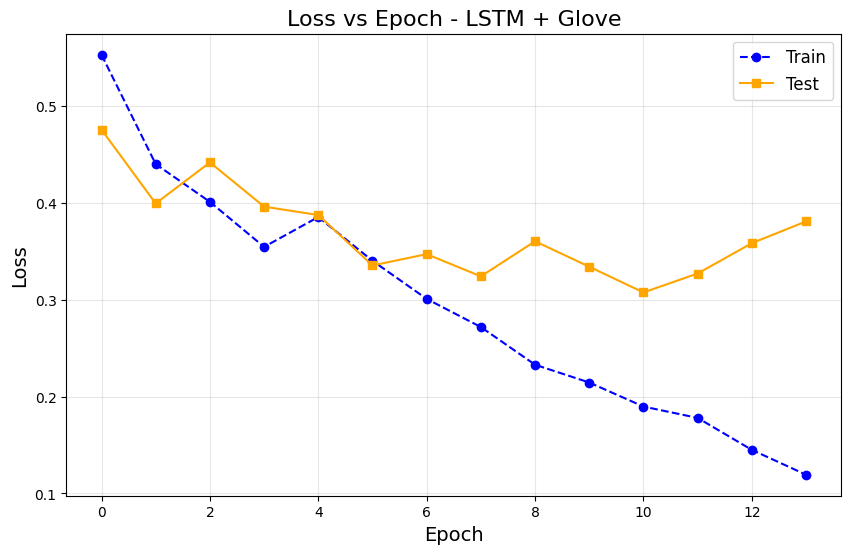

In [30]:
# Graficar la pérdida en cada epoch
plt.figure(figsize=(10, 6))
plt.plot(history2.history['loss'], label='Train', color='blue', linestyle='--', marker='o')
plt.plot(history2.history['val_loss'], label='Test', color='orange', linestyle='-', marker='s')

# Configuración del gráfico
plt.title('Loss vs Epoch - LSTM + Glove', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('loss_epoch_lstm_glove.svg', format='svg')  # Guardar como archivo SVG
plt.show()

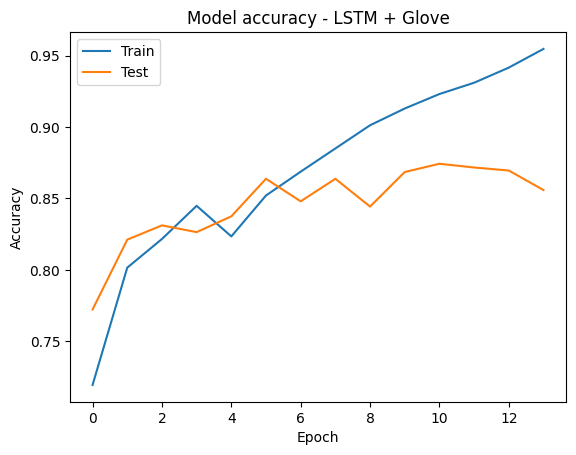

In [31]:
# Gráfico de los valores de Accuracy para Entrenamiento y Prueba para LSTM + Glove
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy - LSTM + Glove')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('accuracy_lstm_glove.svg', format='svg')  # Guardar como archivo SVG
plt.show()